In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [2]:
df = pd.read_csv("Training.txt")
df_val = pd.read_csv("Validation.txt")
df_test = pd.read_csv("Test.txt")

In [3]:
df = df.drop("date",axis =1)
df_val = df_val.drop("date",axis =1)
df_test = df_test.drop("date",axis =1)
df_val.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,23.7000,26.272,585.200000,749.200000,0.004764,1
141,23.7180,26.290,578.400000,760.400000,0.004773,1
142,23.7300,26.230,572.666667,769.666667,0.004765,1
143,23.7225,26.125,493.750000,774.750000,0.004744,1
144,23.7540,26.200,488.600000,779.000000,0.004767,1


In [4]:
df_test.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,21.7900,31.133333,437.333333,1005.666667,0.005030,1


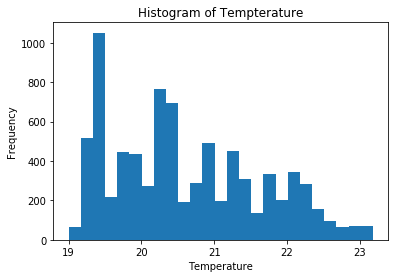

In [5]:
plt.hist(df["Temperature"],25)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("Histogram of Tempterature")
f1 = plt.gcf()

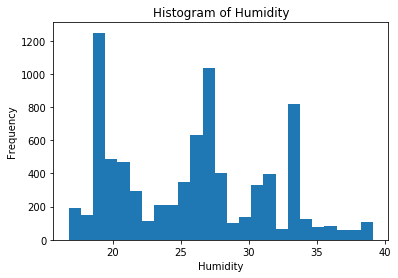

In [6]:
plt.hist(df["Humidity"],25)
plt.ylabel("Frequency")
plt.xlabel("Humidity")
plt.title("Histogram of Humidity")
f2 = plt.gcf()

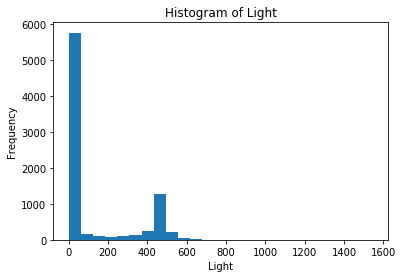

In [7]:
plt.hist(df["Light"],25)
plt.xlabel("Light")
plt.ylabel("Frequency")
plt.title("Histogram of Light")
f3 = plt.gcf()

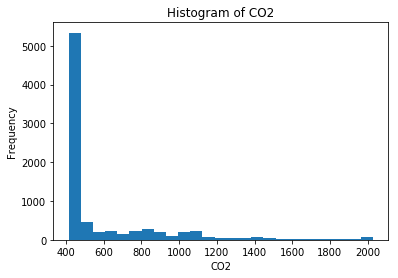

In [8]:
plt.hist(df["CO2"],25)
plt.ylabel("Frequency")
plt.xlabel("CO2")
plt.title("Histogram of CO2")
f4 = plt.gcf()

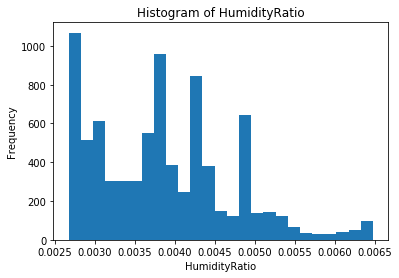

In [9]:
plt.hist(df["HumidityRatio"],25)
plt.xlabel("HumidityRatio")
plt.ylabel("Frequency")
plt.title("Histogram of HumidityRatio")
f5 = plt.gcf()

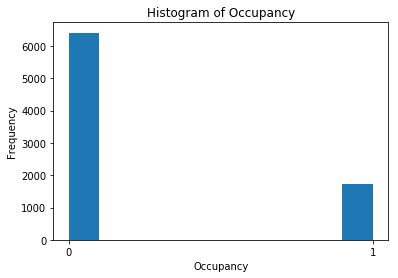

In [10]:
plt.hist(df["Occupancy"])
plt.xlabel("Occupancy")
plt.ylabel("Frequency")  
plt.title("Histogram of Occupancy")
plt.xticks([0,1])
f6 = plt.gcf()

In [11]:
cov = df.cov()
cov

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.034119,-0.797365,128.721228,178.963364,1.315394e-04,0.223846
Humidity,-0.797365,30.594295,40.749601,763.274029,4.503209e-03,0.300787
Light,128.721228,40.749601,37929.823503,40648.651609,3.824894e-02,72.272067
CO2,178.963364,763.274029,40648.651609,98797.613643,1.678578e-01,91.558968
HumidityRatio,0.000132,0.004503,0.038249,0.167858,7.264686e-07,0.000105
Occupancy,0.223846,0.300787,72.272067,91.558968,1.046746e-04,0.167266


In [12]:
corr = df.corr()
corr

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


In [13]:
corr.style.background_gradient(cmap='YlGn')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1,-0.141759,0.649942,0.559894,0.151762,0.53822
Humidity,-0.141759,1,0.0378279,0.439023,0.955198,0.132964
Light,0.649942,0.0378279,1,0.664022,0.23042,0.907352
CO2,0.559894,0.439023,0.664022,1,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.23042,0.626556,1,0.300282
Occupancy,0.53822,0.132964,0.907352,0.712235,0.300282,1


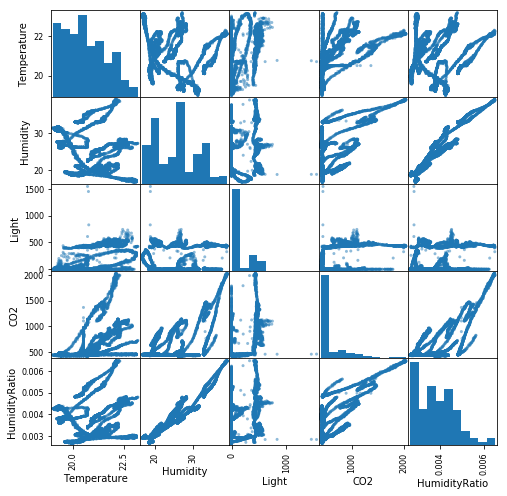

In [14]:
pd.plotting.scatter_matrix(df[["Temperature","Humidity","Light","CO2","HumidityRatio"]], figsize = (8,8))
f4 = plt.gcf()

In [15]:
features = df.columns[:-1]
label = df.columns[-1]

In [16]:
train_x = df[features]
train_y = df[label]
val_x = df_val[features]
val_y = df_val[label]
test_x = df_test[features]
test_y = df_test[label]

### SVM ,kernel = linear,C = 1.0

In [17]:
from sklearn.metrics import accuracy_score

In [21]:
# def error(true,pred):
#     correct = np.array(true) == np.array(pred)
#     err = 1- sum(correct)/ len(true)
#     return err

# def SVM(gamma , kernel, C):
#     clf1 = SVC(gamma,kernel= kernel,C = C)
#     clf1.fit(train_x,train_y)
#     train_pred_y1 = clf1.predict(train_x)
#     val_pred_y1 = clf1.predict(val_x)
#     test_pred_y1 = clf1.predict(test_x)
#     train_acc = accuracy_score(train_y, train_pred_y1)
#     val_acc = accuracy_score(val_y,val_pred_y1)
#     test_acc = accuracy_score(test_y,test_pred_y1)
#     print("train",train_acc )
#     print("validation",val_acc )
#     print("test", test_acc)
#     return train_acc,val_acc,test_acc



In [18]:
def SVM(gamma , kernel, C):
    clf1 = SVC(gamma=gamma,kernel= kernel,C = C)
    clf1.fit(train_x,train_y)
    train_pred_y1 = clf1.predict(train_x)
    val_pred_y1 = clf1.predict(val_x)
    test_pred_y1 = clf1.predict(test_x)
    train_acc = accuracy_score(train_y, train_pred_y1)
    val_acc = accuracy_score(val_y,val_pred_y1)
    test_acc = accuracy_score(test_y,test_pred_y1)
    print("train",train_acc )
    print("validation",val_acc )
    print("test", test_acc)
    return train_acc,val_acc,test_acc


In [19]:
c_range = [1,10,100,200,400,600,800,1000]

acc_train1 = []
acc_val1 = []
acc_test1 = []
for C in c_range:
    a,b,c = SVM("auto",kernel="linear",C=C)
    acc_train1 += [a]
    acc_val1 += [b]
    acc_test1 += [c]

train 0.9862458553358713
validation 0.9786116322701689
test 0.992616899097621
train 0.9871054893773793
validation 0.9786116322701689
test 0.9925143560295324
train 0.9862458553358713
validation 0.9786116322701689
test 0.9924118129614438
train 0.9863686601989439
validation 0.9786116322701689
test 0.9924118129614438
train 0.9871054893773793
validation 0.9786116322701689
test 0.9927194421657096
train 0.986614269925089
validation 0.9786116322701689
test 0.9927194421657096
train 0.9863686601989439
validation 0.9786116322701689
test 0.9923092698933552
train 0.9871054893773793
validation 0.9786116322701689
test 0.9927194421657096


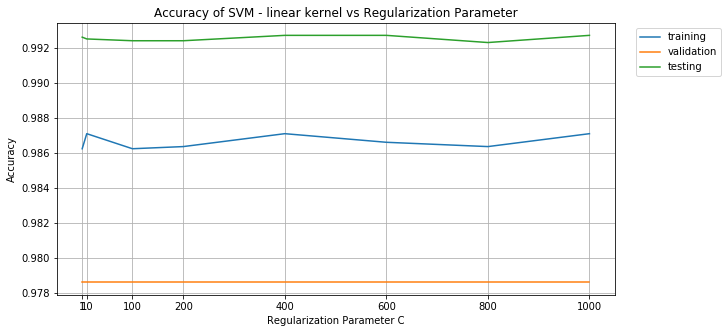

In [20]:
from matplotlib import collections as matcoll

fig, ax = plt.subplots(figsize = (10,5))
line1, =  plt.plot(c_range, acc_train1,label = "training")
line2, =  plt.plot(c_range, acc_val1, label = "validation")
line3, = plt.plot(c_range, acc_test1 , label = "testing")
plt.legend(handles=[line1, line2,line3], loc='upper right', bbox_to_anchor=(1.2, 1))
plt.ylabel("Accuracy")
plt.xlabel("Regularization Parameter C")
plt.xticks(c_range)
plt.title("Accuracy of SVM - linear kernel vs Regularization Parameter")
plt.grid(True)

### SVC ,C = 100, kernel = linear

In [28]:
SVM("scale","sigmoid",1)

train 0.7876703917475132
validation 0.6352720450281426
test 0.7898892534864643


(0.7876703917475132, 0.6352720450281426, 0.7898892534864643)

In [29]:
SVM("scale","rbf",1)

train 0.9911580498587744
validation 0.9459662288930581
test 0.94298605414274


(0.9911580498587744, 0.9459662288930581, 0.94298605414274)

In [31]:
# from sklearn.naive_bayes import GaussianNB
# from yellowbrick.classifier import ClassificationReport

# # Instantiate the classification model and visualizer
# bayes = GaussianNB()
# visualizer = ClassificationReport(bayes, classes=["unoccupied", "occupied"], support=True)

# visualizer.fit(train_x, train_y)  # Fit the visualizer and the model
# visualizer.score(train_x, train_y)  # Evaluate the model on the test data
# g = visualizer.poof()             # Draw/show/poof the data

### KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier


def KNN(train,validate,test, k = 1):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train[features], train[label]) 
    train_pred = neigh.predict(train[features])
    val_pred = neigh.predict(validate[features])
    test_pred = neigh.predict(test[features])
    train_acc = accuracy_score(train_y,train_pred)
    val_acc = accuracy_score(val_y,val_pred)
    test_acc = accuracy_score(test_y,test_pred)
    print("train",train_acc)
    print("validation",val_acc)
    print("test",test_acc)
    return train_acc,val_acc,test_acc

In [22]:
KNN(df,df_val,df_test,100)

train 0.9885791477342503
validation 0.9778611632270169
test 0.9690319934372437


(0.9885791477342503, 0.9778611632270169, 0.9690319934372437)

In [23]:
KNN(df,df_val,df_test)

train 1.0
validation 0.9365853658536586
test 0.9502666119770303


(1.0, 0.9365853658536586, 0.9502666119770303)

In [24]:
KNN(df,df_val,df_test,5)

train 0.992140488763355
validation 0.9425891181988743
test 0.9621616078753076


(0.992140488763355, 0.9425891181988743, 0.9621616078753076)

In [25]:
KNN(df,df_val,df_test,9)

train 0.9896843915019035
validation 0.9617260787992495
test 0.9656480721903199


(0.9896843915019035, 0.9617260787992495, 0.9656480721903199)

In [27]:
KNN(df,df_val,df_test,15)

train 0.9894387817757583
validation 0.9696060037523452
test 0.9679040196882691


(0.9894387817757583, 0.9696060037523452, 0.9679040196882691)

### Perceptron

In [54]:
clf_p = Perceptron(tol=1e-3, random_state=0)
clf_p.fit(train_x, train_y) 
train_pred_p = clf_p.predict(train_x)
val_pred_p = clf_p.predict(val_x)
test_pred_p = clf_p.predict(test_x)
print(classification_report(train_y,train_pred_p, target_names = ["unoccupied","occupied"]))
print(error(train_y,train_pred_p))
print(classification_report(val_y,val_pred_p, target_names = ["unoccupied","occupied"]))
print(error(val_y,val_pred_p))
print(classification_report(test_y,test_pred_p, target_names = ["unoccupied","occupied"]))
print(error(test_y,test_pred_p))

              precision    recall  f1-score   support

  unoccupied       0.99      0.99      0.99      6414
    occupied       0.95      0.96      0.95      1729

   micro avg       0.98      0.98      0.98      8143
   macro avg       0.97      0.97      0.97      8143
weighted avg       0.98      0.98      0.98      8143

0.019771582954684952
              precision    recall  f1-score   support

  unoccupied       1.00      0.97      0.98      1693
    occupied       0.95      1.00      0.97       972

   micro avg       0.98      0.98      0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

0.021388367729831104
              precision    recall  f1-score   support

  unoccupied       0.99      0.99      0.99      7703
    occupied       0.98      0.95      0.96      2049

   micro avg       0.98      0.98      0.98      9752
   macro avg       0.98      0.97      0.98      9752
weighted avg       0.98      0.9

In [28]:
acc_train = []
acc_val = []
acc_test = []
for n in range(1,16):
    print(n)
    a,b,c = KNN(df,df_val,df_test,n)
    
    acc_train += [a]
    acc_val += [b]
    acc_test += [c]

1
train 1.0
validation 0.9365853658536586
test 0.9502666119770303
2
train 0.9952106103401694
validation 0.9230769230769231
test 0.9525225594749795
3
train 0.9948421957509518
validation 0.9350844277673546
test 0.9579573420836751
4
train 0.993614147120226
validation 0.9275797373358349
test 0.9539581624282198
5
train 0.992140488763355
validation 0.9425891181988743
test 0.9621616078753076
6
train 0.992140488763355
validation 0.9324577861163227
test 0.9628794093519278
7
train 0.9906668304064841
validation 0.9609756097560975
test 0.9649302707136997
8
train 0.9902984158172664
validation 0.9549718574108818
test 0.9658531583264971
9
train 0.9896843915019035
validation 0.9617260787992495
test 0.9656480721903199
10
train 0.9899300012280486
validation 0.9598499061913696
test 0.9656480721903199
11
train 0.9896843915019035
validation 0.9617260787992495
test 0.9670836751435603
12
train 0.9896843915019035
validation 0.9606003752345216
test 0.9671862182116489
13
train 0.989807196364976
validation 0.963

([<matplotlib.axis.XTick at 0x10b7e5d68>,
 <a list of 16 Text xticklabel objects>)

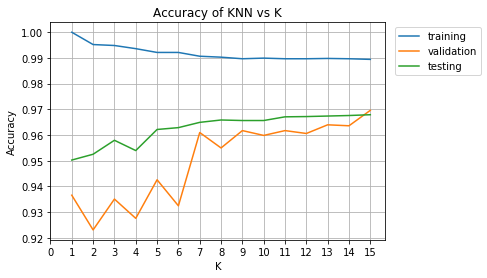

In [29]:
line1, = plt.plot([i for i in range(1,16)],acc_train, label = "training")
line2, = plt.plot([i for i in range(1,16)],acc_val ,label = "validation")
line3, = plt.plot([i for i in range(1,16)],acc_test, label = "testing")
plt.legend(handles=[line1, line2,line3], loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.title("Accuracy of KNN vs K")
plt.grid(True)
plt.xticks([i for i in range(0,16)])

In [87]:
KNN(df,df_val,df_test,4000)

train 0.7876703917475132
validation 0.6352720450281426
test 0.7898892534864643


(0.7876703917475132, 0.6352720450281426, 0.7898892534864643)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,
      random_state=0,max_depth = 1)
clf.fit(train_x, train_y)
train_pred_yg = clf.predict(train_x)
val_pred_yg = clf.predict(val_x)
test_pred_yg = clf.predict(test_x)
print(accuracy_score(train_y, train_pred_yg))
print(accuracy_score(val_y, val_pred_yg))
print(accuracy_score(test_y, test_pred_yg))

0.9878423185558148
0.9786116322701689
0.993129614438064


In [39]:
def GBC(n_estimators = 100, lr = 0.1, depth = 1 ,leaf = 1):
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=lr,
     max_depth=depth, min_samples_leaf = leaf)
    clf.fit(train_x, train_y)
    train_pred_yg = clf.predict(train_x)
    val_pred_yg = clf.predict(val_x)
    test_pred_yg = clf.predict(test_x)
    acc1= accuracy_score(train_y, train_pred_yg)
    acc2 = accuracy_score(val_y, val_pred_yg)
    acc3 = accuracy_score(test_y, test_pred_yg)
#     print("train:", acc1)
#     print("val:",acc2)
#     print("test:",acc3)
    return acc1,acc2,acc3

In [ ]:
acc1 = []
acc2 = []
acc3 = []
for i in range(100,10000):
    print(i)
    a,b,c = GBC(n_estimators = i)
    acc1+=[a]
    acc2+=[b]
    acc3+=[c]


100
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
101
train: 1.0
val: 0.9020637898686679
test: 0.9526251025430681
102
train: 1.0
val: 0.9118198874296435
test: 0.9571369975389664
103
train: 1.0
val: 0.9020637898686679
test: 0.9526251025430681
104
train: 1.0
val: 0.9080675422138836
test: 0.9569319114027892
105
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
106
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
107
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
108
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
109
train: 1.0
val: 0.9106941838649155
test: 0.9570344544708778
110
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
111
train: 1.0
val: 0.9024390243902439
test: 0.9570344544708778
112
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
113
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
114
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
115
train: 1.0
val: 0.9020637898686679
t

train: 1.0
val: 0.9084427767354597
test: 0.9571369975389664
229
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
230
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
231
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
232
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
233
train: 1.0
val: 0.9114446529080675
test: 0.9571369975389664
234
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
235
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
236
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
237
train: 1.0
val: 0.9080675422138836
test: 0.9569319114027892
238
train: 1.0
val: 0.9073170731707317
test: 0.9570344544708778
239
train: 1.0
val: 0.9020637898686679
test: 0.9526251025430681
240
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
241
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
242
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
243
train: 1.0
val: 0.9080675422138836
test:

train: 1.0
val: 0.9080675422138836
test: 0.9570344544708778
358
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
359
train: 1.0
val: 0.9061913696060038
test: 0.9570344544708778
360
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
361
train: 1.0
val: 0.9080675422138836
test: 0.9570344544708778
362
train: 1.0
val: 0.9020637898686679
test: 0.9526251025430681
363
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
364
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
365
train: 1.0
val: 0.9200750469043152
test: 0.9569319114027892
366
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
367
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
368
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
369
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
370
train: 1.0
val: 0.9020637898686679
test: 0.9526251025430681
371
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
372
train: 1.0
val: 0.9020637898686679
test:

train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
487
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
488
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
489
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
490
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
491
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
492
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
493
train: 1.0
val: 0.9020637898686679
test: 0.9526251025430681
494
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
495
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
496
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
497
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
498
train: 1.0
val: 0.9106941838649155
test: 0.9569319114027892
499
train: 1.0
val: 0.9024390243902439
test: 0.9570344544708778
500
train: 1.0
val: 0.9106941838649155
test: 0.9570344544708778
501
train: 1.0
val: 0.9020637898686679
test:

train: 1.0
val: 0.9020637898686679
test: 0.9526251025430681
616
train: 1.0
val: 0.9106941838649155
test: 0.9569319114027892
617
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
618
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
619
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
620
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
621
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
622
train: 1.0
val: 0.9024390243902439
test: 0.9526251025430681
623
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
624
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
625
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
626
train: 1.0
val: 0.9020637898686679
test: 0.9569319114027892
627
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
628
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
629
train: 1.0
val: 0.9020637898686679
test: 0.9570344544708778
630
train: 1.0
val: 0.9080675422138836
test:

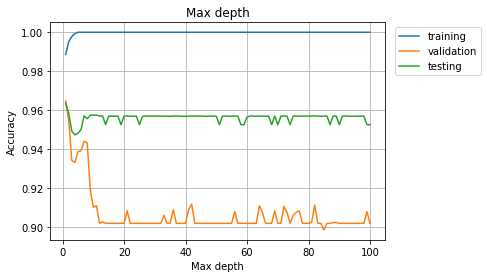

In [105]:
depth = [1,2]
line1, = plt.plot(depth,acc1, label = "training")
line2, = plt.plot(depth,acc2 ,label = "validation")
line3, = plt.plot(depth,acc3, label = "testing")
plt.legend(handles=[line1, line2,line3], loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel("Accuracy")
plt.xlabel("Max depth")
plt.title("Max depth")
plt.grid(True)
# plt.xticks([i for i in range(0,101)])

In [40]:
GBC(lr = 0.1)

(0.9885791477342503, 0.9647279549718574, 0.9636997538966365)

In [43]:
GBC(lr = 0.01)

(0.9878423185558148, 0.9786116322701689, 0.993129614438064)

In [46]:
GBC(lr = 0.001)

(0.7876703917475132, 0.6352720450281426, 0.7898892534864643)

In [28]:
KNN(89)

NameError: name 'KNN' is not defined